# **Stable Diffusion** 🎨 


In [ ]:
#@title Install packages
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 153 kB 33.1 MB/s 
     |████████████████████████████████| 163 kB 71.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 27.6 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 30.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 35.7 MB/s 


Now you can login with your user token.

In [ ]:
#@title Hugging face login
# Enable custom widgets
from google.colab import output
output.enable_custom_widget_manager()
# Login
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
#@title Import model
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)  

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

{'trained_betas'} was not found in config. Values will be initialized to default values.


In [ ]:
#@title Put to GPU
pipe = pipe.to("cuda")

In [ ]:
#@title Prompt
PROMPT = "An astronaut riding a horse, black and white, photorealist" #@param [""] {allow-input: true}
FILENAME = "horse_astronaut" #@param ["horse", "frog"] {allow-input: true}

  0%|          | 0/51 [00:00<?, ?it/s]

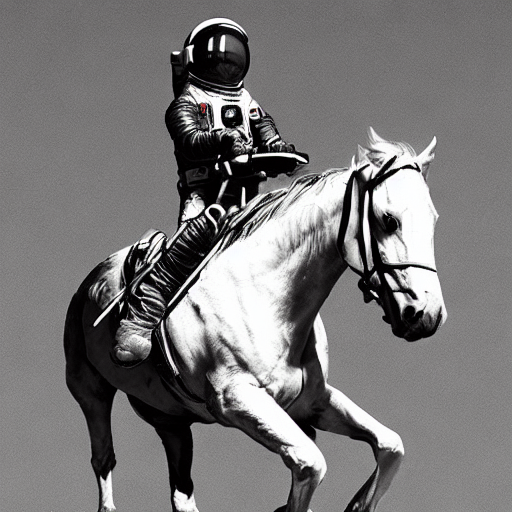

In [ ]:
#@title Run Stable Diffusion
from torch import autocast

prompt = PROMPT if len(PROMPT) > 0 else "An astronaut riding a horse"
with autocast("cuda"):
  image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# or if you're in a google colab you can directly display it with 
image

## Save image to Drive

In [ ]:
#@title Load dependencies
!apt-get install exiftool

from google.colab import drive
drive.mount('/content/gdrive')

import os
import datetime

def filename(FILENAME, FOLDER):
  ext = ".png"
  ls = sorted(os.listdir(FOLDER))
  counter = sum([ 1 for item in ls if FILENAME in item])
  suffix = "_" + str(counter + 1) if counter > 0 else ""
  name = FILENAME + suffix + ext
  return name
  
def metadata(imagepath):
  AUTHOR = "Samuel ORTION"
  COPYRIGHT = "Creative Commons By SA 4.0 or later"
  RELATION = "https://samuel.ortion.fr/"
  DESCRIPTION = f"prompt: {PROMPT}"
  cmd = f"""exiftool -use MWG -P -m -overwrite_original_in_place -Copyright="{COPYRIGHT}" -Creator="{AUTHOR}" -Relation="{RELATION}" -Exif:ImageDescription="{DESCRIPTION}" -Description="{DESCRIPTION}" "{imagepath}" """
  os.system(cmd)

def save(image):
  OUTFOLDER = "/content/gdrive/MyDrive/media/stablediff"
  FILEPATH = os.path.join(OUTFOLDER, filename(FILENAME, OUTFOLDER))
  image.save(FILEPATH)
  metadata(FILEPATH)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
libimage-exiftool-perl is already the newest version (10.80-1ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#@title Save
save(image)